In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_acustico= pd.read_csv('..\\..\\datasets\\raw\\datos.csv' , sep = ',', encoding='utf-8')

In [3]:
print("Modelo de datos de: steam_games ")
print("Cantidad de registros :", df_acustico.shape[0], "Cantidad de las Columnas :", df_acustico.shape[1])
print("\n")
df_acustico.info()
print("\n")
df_acustico.head(5)

Modelo de datos de: steam_games 
Cantidad de registros : 62022 Cantidad de las Columnas : 78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   split                                         62022 non-null  object 
 1   sensor_id                                     62022 non-null  int64  
 2   audio_filename                                62022 non-null  object 
 3   annotator_id                                  62022 non-null  int64  
 4   borough                                       62022 non-null  int64  
 5   block                                         62022 non-null  int64  
 6   latitude                                      62022 non-null  float64
 7   longitude                                     62022 non-null  float64
 8   year                                     

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


### Air Quality

1. **Variables de ubicación:**
   - `geo_place_name`: Nombre del lugar donde se registran los datos.
   - `geo_type_name`: Tipo de ubicación (por ejemplo, ciudad, distrito).
   - `start_date`: Fecha y hora de inicio del período de medición.

2. **Variables relacionadas con el tráfico:**
   - `indicator_id` o `name`: Identificador o nombre del indicador relacionado con el tráfico.
   - `measure`: Tipo de medida (por ejemplo, tráfico de vehículos, congestión).
   - `measure_info`: Información adicional sobre la medida (por ejemplo, velocidad media, densidad de tráfico).

3. **Variables de valor de los datos:**
   - `data_value`: Valor numérico que representa alguna métrica relacionada con el tráfico (por ejemplo, número de vehículos, velocidad promedio).

4. **Variables de tiempo:**
   - `time_period`: Período de tiempo durante el cual se recopilaron los datos (por ejemplo, hora del día, día de la semana).
   - `start_date`: Fecha y hora de inicio del período de medición.

5. **Variables de identificación:**
   - `unique_id`: Identificador único para cada registro de datos.
   - `geo_join_id`: Identificador de unión geográfica que podría ser útil para unir con otras fuentes de datos geoespaciales.

Dado que la cantidad de columnas en tu DataFrame es relativamente pequeña (11 columnas), puedes considerar incluir la mayoría de estas variables en tu análisis. Sin embargo, si deseas reducir el número de variables, podrías comenzar seleccionando las que consideres más relevantes para tus objetivos específicos de investigación sobre el tránsito en taxis. También puedes realizar un análisis exploratorio de datos para identificar qué variables tienen la mayor correlación con tu variable objetivo o están más relacionadas con los patrones de tráfico que deseas estudiar.

In [4]:
# Seleccionar las variables relevantes
variables_seleccionadas = [
    'borough', 'latitude', 'longitude',  # Variables de ubicación
    'year', 'week', 'day', 'hour',       # Variables de tiempo
    # Variables de sonido
    '1-1_small-sounding-engine_presence', '1-2_medium-sounding-engine_presence', '1-3_large-sounding-engine_presence',
    '2-1_rock-drill_presence', '2-2_jackhammer_presence', '2-3_hoe-ram_presence', '2-4_pile-driver_presence',
    '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence', '4-2_small-medium-rotating-saw_presence',
    '4-3_large-rotating-saw_presence', '5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence',
    '5-4_reverse-beeper_presence', '6-1_stationary-music_presence', '6-2_mobile-music_presence', '6-3_ice-cream-truck_presence',
    '7-1_person-or-small-group-talking_presence', '7-2_person-or-small-group-shouting_presence', '7-3_large-crowd_presence',
    '7-4_amplified-speech_presence', '8-1_dog-barking-whining_presence',
    # Variables adicionales
    '1_engine_presence', '2_machinery-impact_presence', '3_non-machinery-impact_presence', '4_powered-saw_presence',
    '5_alert-signal_presence', '6_music_presence', '7_human-voice_presence', '8_dog_presence',
    # Variables de identificación
    'sensor_id', 'audio_filename', 'annotator_id'
]

# Seleccionar las columnas relevantes del DataFrame
df_seleccionado = df_acustico[variables_seleccionadas].copy()

In [5]:
pd.set_option('display.max_columns', 500)  #

In [6]:
df_seleccionado.head()

,borough,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,2-1_rock-drill_presence,2-2_jackhammer_presence,2-3_hoe-ram_presence,2-4_pile-driver_presence,3-1_non-machinery-impact_presence,4-1_chainsaw_presence,4-2_small-medium-rotating-saw_presence,4-3_large-rotating-saw_presence,5-1_car-horn_presence,5-2_car-alarm_presence,5-3_siren_presence,5-4_reverse-beeper_presence,6-1_stationary-music_presence,6-2_mobile-music_presence,6-3_ice-cream-truck_presence,7-1_person-or-small-group-talking_presence,7-2_person-or-small-group-shouting_presence,7-3_large-crowd_presence,7-4_amplified-speech_presence,8-1_dog-barking-whining_presence,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence,sensor_id,audio_filename,annotator_id
0,1,40.72951,-73.99388,2019,43,4,8,-1,-1,-1,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,-1,0,00_026884.wav,-6
1,1,40.72951,-73.99388,2019,43,4,8,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,00_026884.wav,-4
2,1,40.72951,-73.99388,2019,43,4,8,0,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,0,00_026884.wav,-3
3,1,40.72951,-73.99388,2019,43,4,8,-1,-1,-1,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,-1,0,00_026884.wav,-1
4,1,40.72951,-73.99388,2019,43,4,8,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,00_026884.wav,0


In [7]:
df_seleccionado.audio_filename.value_counts()

audio_filename
56_027236.wav    22
04_026992.wav    22
61_027827.wav    22
01_010420.wav    20
00_000066.wav    20
                 ..
25_010964.wav     3
25_010992.wav     3
25_011018.wav     3
25_011136.wav     3
46_020853.wav     3
Name: count, Length: 18510, dtype: int64

In [8]:
df_seleccionado.audio_filename.unique()

array(['00_026884.wav', '00_026919.wav', '00_027065.wav', ...,
       '46_020723.wav', '46_020807.wav', '46_020853.wav'], dtype=object)

In [9]:
# Eliminar la extensión ".wav" de los valores en la columna "audio_filename"
df_seleccionado['audio_filename'] = df_seleccionado['audio_filename'].str.replace('.wav', '')

In [10]:
df_seleccionado.audio_filename.value_counts()

audio_filename
56_027236    22
04_026992    22
61_027827    22
01_010420    20
00_000066    20
             ..
25_010964     3
25_010992     3
25_011018     3
25_011136     3
46_020853     3
Name: count, Length: 18510, dtype: int64

In [18]:
df_seleccionado.sensor_id.value_counts()

sensor_id
40    4142
6     3858
27    3590
1     3588
4     2649
3     2286
29    2127
2     2058
31    2031
16    1998
0     1906
32    1815
34    1765
24    1732
37    1667
5     1524
41    1436
10    1398
18    1383
38    1378
25    1354
7     1238
35    1217
11    1127
13    1103
20    1079
23    1063
9     1062
19    1055
17     867
33     761
22     627
14     536
46     533
36     468
39     458
30     436
12     340
28     333
21     302
8      258
15     216
50     176
55     160
45     139
26     139
49     120
56     118
48      82
53      78
51      66
61      46
57      44
52      42
58      36
54      12
Name: count, dtype: int64

In [11]:
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   borough                                      62022 non-null  int64  
 1   latitude                                     62022 non-null  float64
 2   longitude                                    62022 non-null  float64
 3   year                                         62022 non-null  int64  
 4   week                                         62022 non-null  int64  
 5   day                                          62022 non-null  int64  
 6   hour                                         62022 non-null  int64  
 7   1-1_small-sounding-engine_presence           62022 non-null  int64  
 8   1-2_medium-sounding-engine_presence          62022 non-null  int64  
 9   1-3_large-sounding-engine_presence           62022 non-null  int64  
 10

In [20]:
df_seleccionado.borough.unique()

array([1, 3, 4], dtype=int64)

In [36]:
df_seleccionado.sensor_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       20, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40,
       41, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61,  8, 15, 19,
       21, 26, 28, 36, 46], dtype=int64)

In [35]:
df_seleccionado['7_human-voice_presence'].unique()

array([-1,  0,  1], dtype=int64)

In [37]:
df_seleccionado['5-3_siren_presence'].unique()

array([-1,  0,  1], dtype=int64)

In [ ]:
variables_seleccionadas = [
    'borough', 'latitude', 'longitude',  # Variables de ubicación
    'year', 'week', 'day', 'hour',       # Variables de tiempo
    # Variables de sonido
    '1-1_small-sounding-engine_presence', '1-2_medium-sounding-engine_presence', '1-3_large-sounding-engine_presence',
    '2-1_rock-drill_presence', '2-2_jackhammer_presence', '2-3_hoe-ram_presence', '2-4_pile-driver_presence',
    '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence', '4-2_small-medium-rotating-saw_presence',
    '4-3_large-rotating-saw_presence', '5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence',
    '5-4_reverse-beeper_presence', '6-1_stationary-music_presence', '6-2_mobile-music_presence', '6-3_ice-cream-truck_presence',
    '7-1_person-or-small-group-talking_presence', '7-2_person-or-small-group-shouting_presence', '7-3_large-crowd_presence',
    '7-4_amplified-speech_presence', '8-1_dog-barking-whining_presence',
    # Variables adicionales
    '1_engine_presence', '2_machinery-impact_presence', '3_non-machinery-impact_presence', '4_powered-saw_presence',
    '5_alert-signal_presence', '6_music_presence', '7_human-voice_presence', '8_dog_presence',
    # Variables de identificación
    'sensor_id', 'audio_filename', 'annotator_id'
]

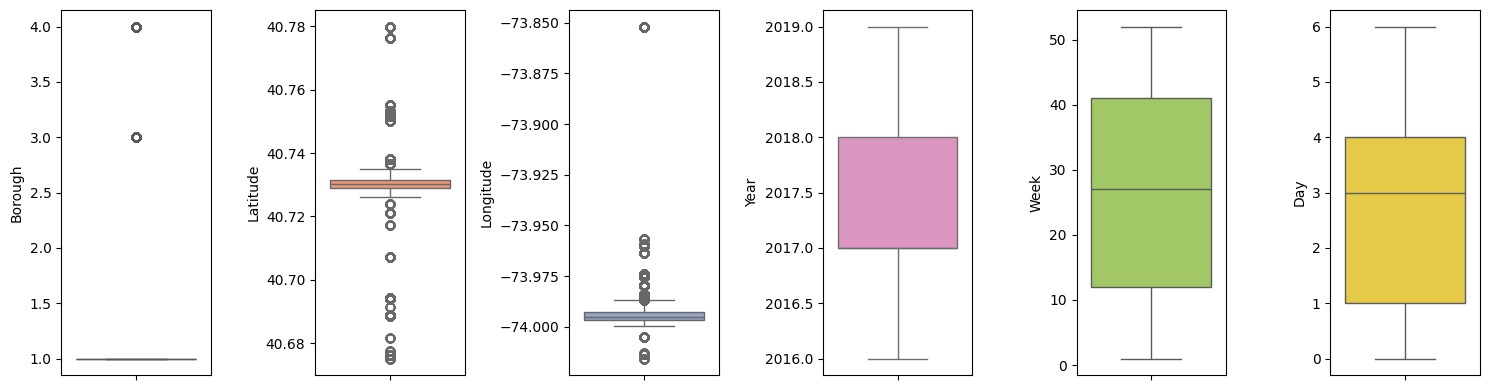

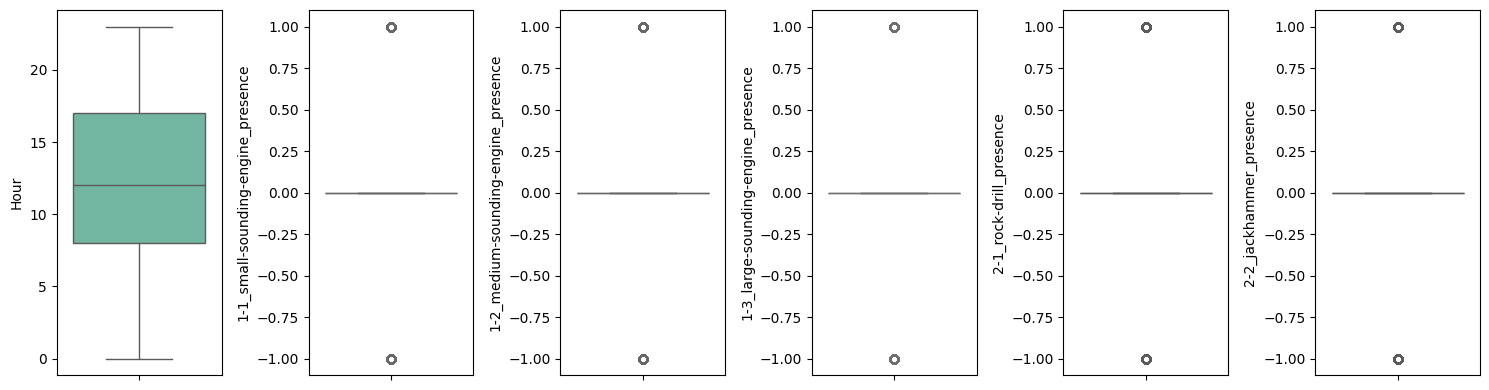

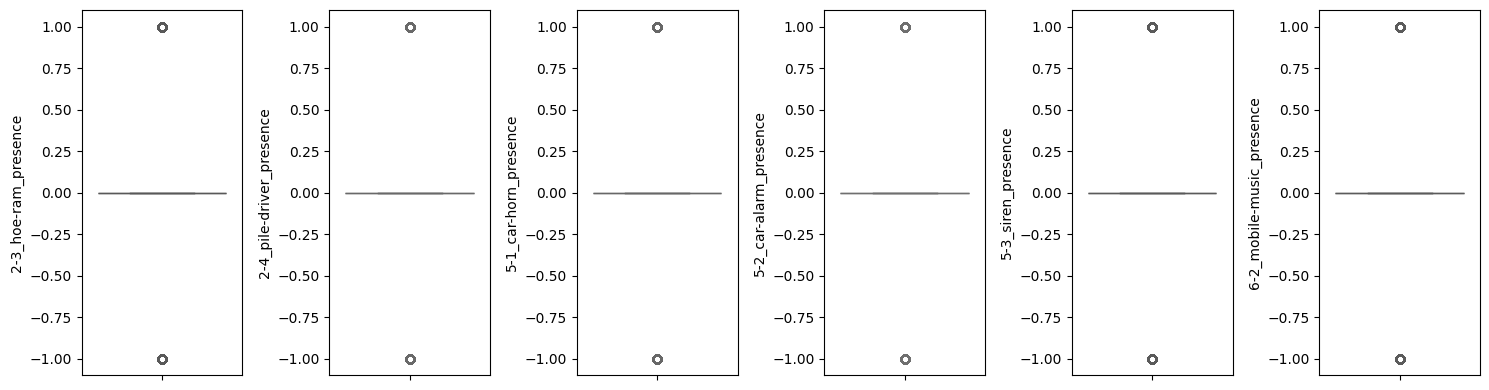

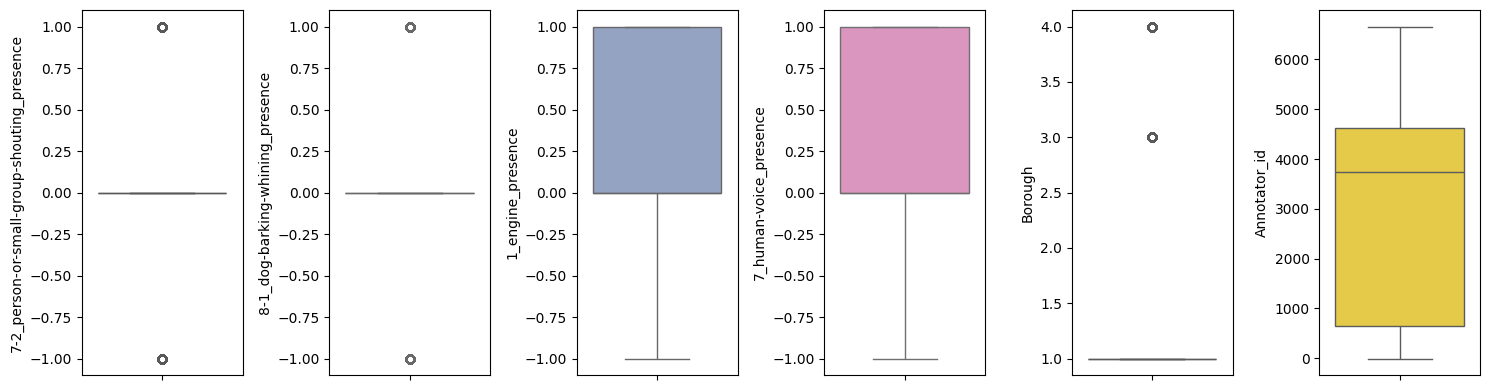

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, numeric_vars, figsize=(15, 4)):
    """
    Crea gráficos de boxplots para variables numéricas en un DataFrame.

    Parameters:
    - df (pd.DataFrame): El DataFrame que contiene los datos.
    - numeric_vars (list): Lista de nombres de columnas numéricas en el DataFrame.
    - figsize (tuple, optional): El tamaño de la figura. Por defecto, es (15, 4).

    Returns:
    None
    """
    # Calculamos el número de bloques
    num_blocks = (len(numeric_vars) + 5) // 6  # División entera redondeando hacia arriba
    
    # Creamos una figura para cada bloque
    for block in range(num_blocks):
        start_idx = block * 6
        end_idx = min((block + 1) * 6, len(numeric_vars))
        
        plt.figure(figsize=figsize)
        colors = sns.color_palette("Set2", n_colors=len(numeric_vars))

        for i, variable in enumerate(numeric_vars[start_idx:end_idx], start=1):
            plt.subplot(1, min(6, len(numeric_vars) - start_idx), i)
            sns.boxplot(data=df, y=variable, color=colors[i-1])
            plt.ylabel(variable.capitalize())  # Añadir etiquetas en mayúsculas para mejor legibilidad

        plt.tight_layout()
        plt.show()

# Suponiendo que df_seleccionado contiene tus datos y df_seleccionado.select_dtypes(include=['number']).columns
# proporciona las columnas numéricas que deseas graficar.
numeric_variables = ['borough', 'latitude', 'longitude','year', 'week', 'day', 'hour','1-1_small-sounding-engine_presence', '1-2_medium-sounding-engine_presence', '1-3_large-sounding-engine_presence',
    '2-1_rock-drill_presence', '2-2_jackhammer_presence', '2-3_hoe-ram_presence', '2-4_pile-driver_presence','5-1_car-horn_presence', 
    '5-2_car-alarm_presence', '5-3_siren_presence','6-2_mobile-music_presence', '7-2_person-or-small-group-shouting_presence', '8-1_dog-barking-whining_presence',
    '1_engine_presence','7_human-voice_presence','borough','annotator_id']
# Llama a la función con tu DataFrame y las columnas numéricas que deseas graficar
plot_boxplots(df_seleccionado, numeric_variables)
# Llama a la función con tu DataFrame y las columnas numéricas que deseas graficar
# plot_boxplots(df_seleccionado, df_seleccionado.select_dtypes(include=['number']).columns)

In [20]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Supongamos que df es tu DataFrame con los datos
df = df_seleccionado.copy()

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Análisis de la contaminación acústica"),
    html.P("x-axis:"),
    dcc.Checklist(
        id='x-axis', 
        options=['borough', 'year', 'week', 'day', 'hour'],
        value=['hour'], 
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='y-axis', 
        options=['1-1_small-sounding-engine_presence', '1-2_medium-sounding-engine_presence', '1-3_large-sounding-engine_presence',
                 '2-1_rock-drill_presence', '2-2_jackhammer_presence', '2-3_hoe-ram_presence', '2-4_pile-driver_presence',
                 '5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence', '7_human-voice_presence', '6_music_presence', 'annotator_id'],
        value='1-1_small-sounding-engine_presence', 
        inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    [Input("x-axis", "value"), 
     Input("y-axis", "value")]
)
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)


In [33]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of Iris data using scatter matrix'),
    dcc.Dropdown(
        id="dropdown",
        options=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        value=['sepal_length', 'sepal_width'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(dims):
    df = px.data.iris() # replace with your own data source
    fig = px.scatter_matrix(
        df, dimensions=dims, color="species")
    return fig


app.run_server(debug=True)